In [254]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [255]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [256]:
emissions = pd.read_csv("GCB2022v27_MtCO2_flat.csv")
temps = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [257]:
emissions.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


#### Exploring the Temperature Data

In [259]:
temps = temps[temps["Country"] == "United States"]
temps['dt'] = temps['dt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
temps = temps[temps["dt"] > datetime(1899, 12, 31).date()]

In [260]:
temps['year'] = pd.DatetimeIndex(temps['dt']).year
temps['month'] = pd.DatetimeIndex(temps['dt']).month

In [261]:
temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month
556456,1900-01-01,-2.573,0.443,United States,1900,1
556457,1900-02-01,-2.912,0.533,United States,1900,2
556458,1900-03-01,2.636,0.358,United States,1900,3
556459,1900-04-01,8.091,0.263,United States,1900,4
556460,1900-05-01,14.317,0.239,United States,1900,5


<AxesSubplot:>

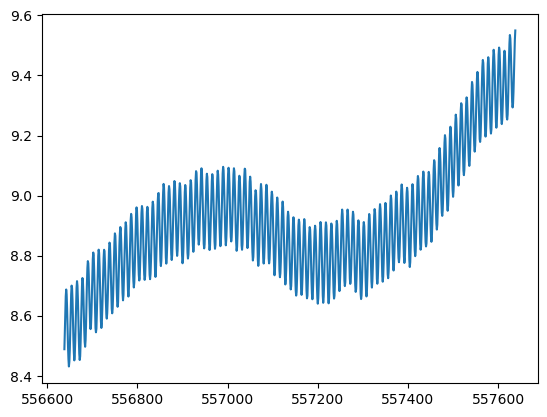

In [262]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = temps["AverageTemperature"]
result = seasonal_decompose(series, model='additive', period=365)
result.trend.plot()


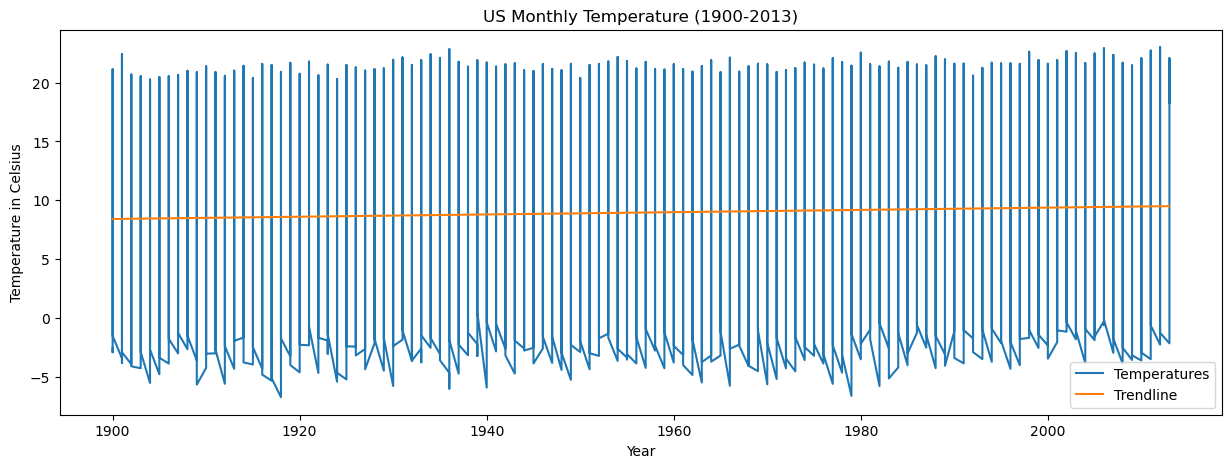

In [263]:
plt.figure(figsize = (15, 5))

plt.plot(temps["year"], temps["AverageTemperature"])
plt.title("US Monthly Temperature (1900-2013)")
plt.xlabel("Year")
plt.ylabel("Temperature in Celsius")

z = np.polyfit(temps["year"], temps["AverageTemperature"], 1)
p = np.poly1d(z)

plt.plot(temps["year"], p(temps["year"]))

plt.legend(["Temperatures", "Trendline"]);

In [264]:
usa_temps = temps.groupby("year")["AverageTemperature"].mean()

In [265]:
list(usa_temps.values)

[9.021583333333334,
 8.494916666666667,
 8.453999999999999,
 7.977250000000001,
 8.200666666666665,
 8.402333333333333,
 8.560083333333333,
 8.394,
 8.755583333333334,
 8.221833333333334,
 8.757916666666667,
 8.737916666666667,
 8.140916666666667,
 8.552166666666666,
 8.8765,
 8.648249999999999,
 8.180083333333334,
 7.669499999999999,
 8.50125,
 8.538,
 8.1845,
 9.595666666666666,
 8.768166666666668,
 8.760333333333334,
 8.052333333333333,
 9.016416666666666,
 9.14025,
 8.719333333333333,
 8.876,
 8.4395,
 8.737666666666668,
 9.56075,
 8.5395,
 9.030583333333334,
 9.826583333333334,
 8.7425,
 8.92225,
 8.73075,
 9.471833333333334,
 9.3075,
 9.097166666666668,
 9.266083333333333,
 8.919333333333332,
 9.0035,
 8.898166666666667,
 8.671249999999999,
 9.179583333333333,
 8.836083333333333,
 8.481666666666667,
 8.888083333333332,
 8.656416666666667,
 8.416583333333334,
 8.979416666666667,
 9.530416666666666,
 9.410583333333333,
 8.517166666666666,
 8.699916666666667,
 9.126333333333333,
 8.

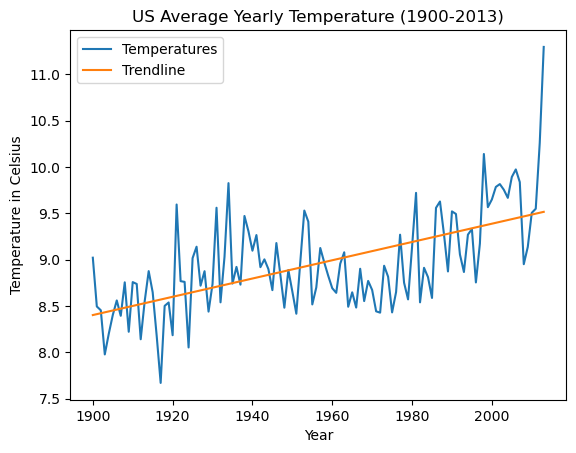

In [266]:
plt.plot(usa_temps)
plt.title("US Average Yearly Temperature (1900-2013)")
plt.xlabel("Year")
plt.ylabel("Temperature in Celsius")

z = np.polyfit(list(usa_temps.keys()), list(usa_temps.values), 1)
p = np.poly1d(z)

plt.plot(usa_temps.keys(), p(usa_temps.keys()))

plt.legend(["Temperatures", "Trendline"]);

In [267]:
jan_temps = temps[temps["month"] == 1]
july_temps = temps[temps["month"] == 7]
jan_temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month
556456,1900-01-01,-2.573,0.443,United States,1900,1
556468,1901-01-01,-3.432,0.358,United States,1901,1
556480,1902-01-01,-3.927,0.676,United States,1902,1
556492,1903-01-01,-4.273,0.630,United States,1903,1
556504,1904-01-01,-5.517,0.804,United States,1904,1


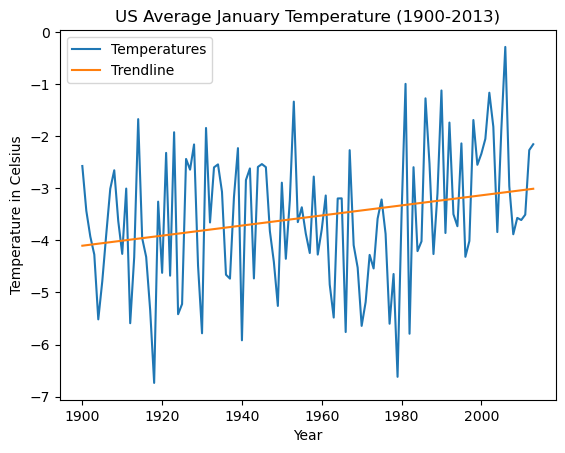

In [268]:
plt.plot(jan_temps["year"], jan_temps["AverageTemperature"])
plt.title("US Average January Temperature (1900-2013)")
plt.xlabel("Year")
plt.ylabel("Temperature in Celsius")

z = np.polyfit(jan_temps["year"], jan_temps["AverageTemperature"], 1)
p = np.poly1d(z)

plt.plot(jan_temps["year"], p(jan_temps["year"]))

plt.legend(["Temperatures", "Trendline"]);

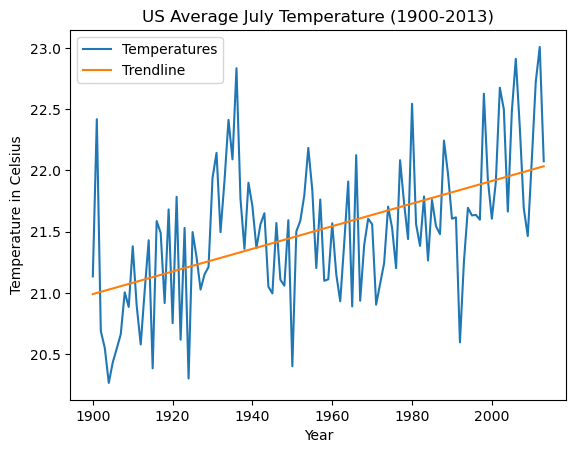

In [269]:
plt.plot(july_temps["year"], july_temps["AverageTemperature"])
plt.title("US Average July Temperature (1900-2013)")
plt.xlabel("Year")
plt.ylabel("Temperature in Celsius")

z = np.polyfit(july_temps["year"], july_temps["AverageTemperature"], 1)
p = np.poly1d(z)

plt.plot(july_temps["year"], p(july_temps["year"]))

plt.legend(["Temperatures", "Trendline"]);

#### Exploring the Emissions Data

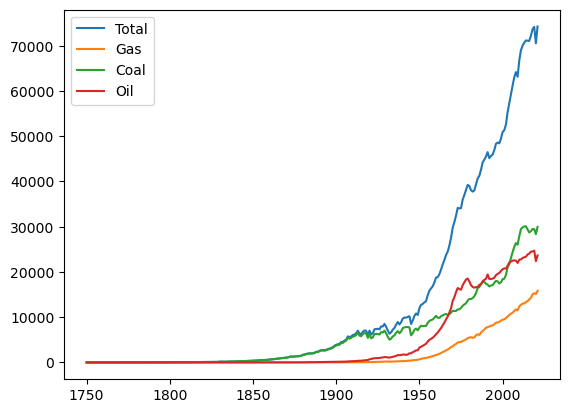

In [270]:
world_emissions = emissions.groupby("Year")[["Total", "Gas", "Coal", "Oil"]].sum()
plt.plot(world_emissions)

plt.legend(["Total", "Gas", "Coal", "Oil"]);

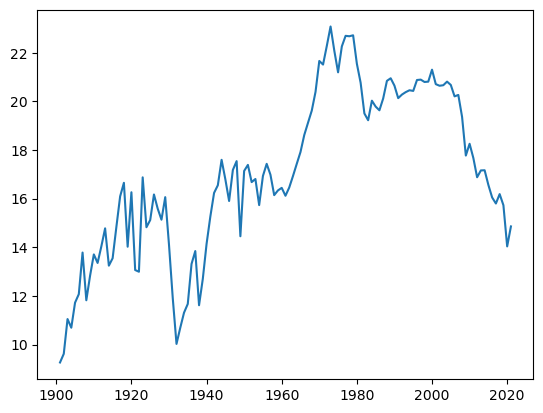

In [295]:
world_percap_emissions = emissions.groupby("Year")["Per Capita"].sum()
plt.plot(world_percap_emissions);


In [271]:
emissions = emissions[emissions["Country"] == "USA"]
emissions = emissions[emissions["Year"] > 1900]


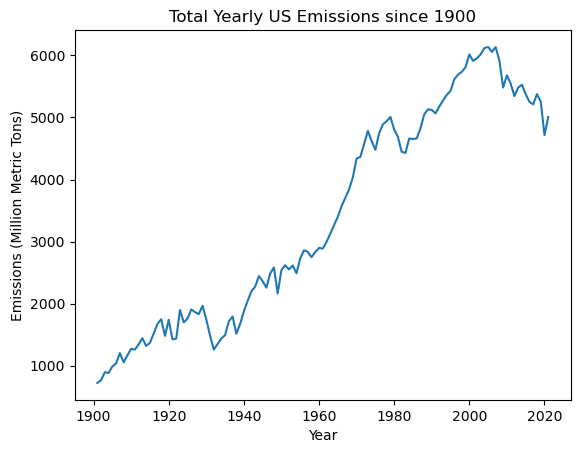

In [272]:
plt.plot(emissions["Year"], emissions["Total"])
plt.title("Total Yearly US Emissions since 1900")
plt.xlabel("Year")
plt.ylabel("Emissions (Million Metric Tons)");

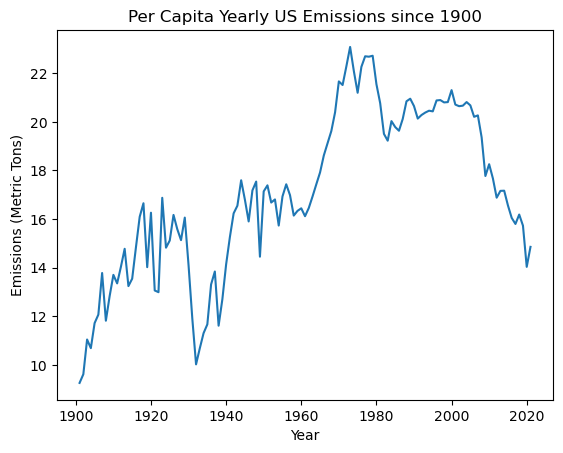

In [273]:
plt.plot(emissions["Year"], emissions["Per Capita"])
plt.title("Per Capita Yearly US Emissions since 1900")
plt.xlabel("Year")
plt.ylabel("Emissions (Metric Tons)");

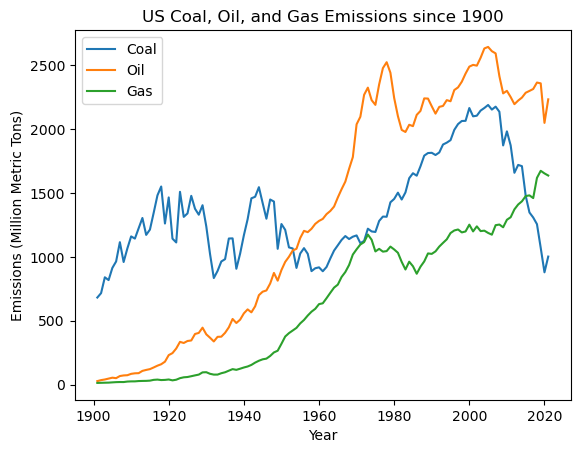

In [274]:

plt.plot(emissions["Year"], emissions["Coal"])
plt.plot(emissions["Year"], emissions["Oil"])
plt.plot(emissions["Year"], emissions["Gas"])

plt.legend(["Coal", "Oil", "Gas"])

plt.title("US Coal, Oil, and Gas Emissions since 1900")
plt.xlabel("Year")
plt.ylabel("Emissions (Million Metric Tons)");

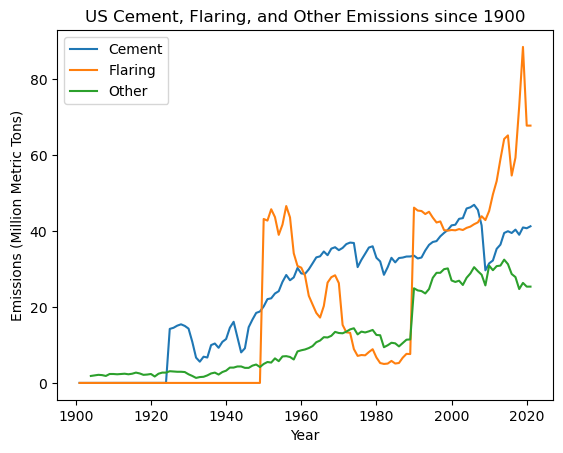

In [275]:
plt.plot(emissions["Year"], emissions["Cement"])
plt.plot(emissions["Year"], emissions["Flaring"])
plt.plot(emissions["Year"], emissions["Other"])
plt.legend(["Cement", "Flaring", "Other"])

plt.title("US Cement, Flaring, and Other Emissions since 1900")
plt.xlabel("Year")
plt.ylabel("Emissions (Million Metric Tons)");

#### Testing the Storm Database

In [276]:
tester = pd.read_csv("StormEvents_details-ftp_v1.0_d1950_c20210803.csv.gz")


In [277]:
tester.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,1950,April,Tornado,C,149,WASHITA,NaN,28-APR-50 14:45:00,CST,28-APR-50 14:45:00,0,0,0,0,250K,0,NaN,0,NaN,NaN,NaN,F3,3.4,400,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,1950,April,Tornado,C,93,COMANCHE,NaN,29-APR-50 15:30:00,CST,29-APR-50 15:30:00,0,0,0,0,25K,0,NaN,0,NaN,NaN,NaN,F1,11.5,200,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,1950,July,Tornado,C,77,LEHIGH,NaN,05-JUL-50 18:00:00,CST,05-JUL-50 18:00:00,2,0,0,0,25K,0,NaN,0,NaN,NaN,NaN,F2,12.9,33,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,1950,July,Tornado,C,43,DAUPHIN,NaN,05-JUL-50 18:30:00,CST,05-JUL-50 18:30:00,0,0,0,0,2.5K,0,NaN,0,NaN,NaN,NaN,F2,0.0,13,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,1950,July,Tornado,C,39,CRAWFORD,NaN,24-JUL-50 14:40:00,CST,24-JUL-50 14:40:00,0,0,0,0,2.5K,0,NaN,0,NaN,NaN,NaN,F0,0.0,33,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [278]:
tester.EVENT_TYPE.value_counts()

Tornado    223
Name: EVENT_TYPE, dtype: int64

In [279]:
tester.STATE.value_counts()

KANSAS            33
LOUISIANA         28
OKLAHOMA          25
TEXAS             20
MISSISSIPPI       16
ARKANSAS          13
ILLINOIS          11
NORTH CAROLINA     9
NEBRASKA           6
MISSOURI           6
WISCONSIN          6
PENNSYLVANIA       6
FLORIDA            6
GEORGIA            4
IOWA               4
WYOMING            3
COLORADO           3
INDIANA            3
TENNESSEE          3
OHIO               3
NORTH DAKOTA       2
KENTUCKY           2
ALABAMA            2
CONNECTICUT        2
NEW MEXICO         2
MINNESOTA          1
MARYLAND           1
SOUTH CAROLINA     1
WEST VIRGINIA      1
SOUTH DAKOTA       1
Name: STATE, dtype: int64

In [280]:
test_2021 = pd.read_csv("StormEvents_details-ftp_v1.0_d2021_c20221216.csv.gz")
test_2022 = pd.read_csv("StormEvents_details-ftp_v1.0_d2022_c20221216.csv.gz")

In [281]:
test_2021.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202102,15,2357,202102,15,2358,156532,950756,NORTH CAROLINA,37,2021,February,Thunderstorm Wind,C,19,BRUNSWICK,ILM,15-FEB-21 23:57:00,EST-5,15-FEB-21 23:58:00,0,0,0,0,0.00K,0.00K,NWS Storm Survey,96.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,S,CAMP BRANCH,4.0,S,CAMP BRANCH,34.127,-78.3541,34.1278,-78.3508,Strong low pressure and a cold front produced ...,A few hundred trees were snapped or uprooted b...,CSV
1,202106,3,1842,202106,3,1845,161414,974816,IDAHO,16,2021,June,Thunderstorm Wind,C,45,GEM,BOI,03-JUN-21 18:42:00,MST-7,03-JUN-21 18:45:00,0,0,0,0,0.00K,0.00K,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,SE,LETHA,2.0,ESE,LETHA,43.890,-116.6400,43.8895,-116.6058,Sufficient daytime heating lead to isolated af...,Branches knocked down with photo. Personal Wea...,CSV
2,202106,22,1850,202106,22,1855,161423,974825,OREGON,41,2021,June,Thunderstorm Wind,C,45,MALHEUR,BOI,22-JUN-21 18:50:00,MST-7,22-JUN-21 18:55:00,0,0,0,0,0.00K,0.00K,ASOS,54.0,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NE,LUSE,0.0,NW,ONTARIO,44.020,-117.0200,44.0310,-116.9711,Hot and dry conditions were ideal for thunders...,The ASOS at Ontario reported a 62 MPH thunders...,CSV
3,202102,7,1600,202102,7,1600,157970,954745,PUERTO RICO,99,2021,February,Rip Current,Z,1,SAN JUAN AND VICINITY,SJU,07-FEB-21 16:00:00,AST-4,07-FEB-21 16:00:00,0,0,1,0,0.00K,0.00K,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A tourist couple was swept by rip currents at ...,A tourist couple was swept by rip currents at ...,CSV
4,202102,28,900,202102,28,900,157971,954749,VIRGIN ISLANDS,96,2021,February,Rip Current,Z,2,ST. CROIX,SJU,28-FEB-21 09:00:00,AST-4,28-FEB-21 09:00:00,0,0,1,0,0.00K,0.00K,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A tourist staying at the Carambola Beach Resor...,A tourist staying at the Carambola Beach Resor...,CSV


In [282]:
test_2022.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202202,20,2118,202202,20,2218,165464,999902,NEVADA,32,2022,February,High Wind,Z,33,SOUTHEASTERN ELKO,LKN,20-FEB-22 21:18:00,PST-8,20-FEB-22 22:18:00,0,0,0,0,0.00K,0.00K,Mesonet,36.0,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong winds increased ahead of an approaching...,"Station (UP994) 3.1 SE West Wendover, Elevatio...",CSV
1,202202,21,800,202202,22,1000,165465,999903,NEVADA,32,2022,February,Heavy Snow,Z,37,S LANDER & S EUREKA,LKN,21-FEB-22 08:00:00,PST-8,22-FEB-22 10:00:00,0,0,0,0,0.00K,0.00K,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Thirteen inches fell at station (BCSN2) Big Cr...,CSV
2,202202,22,200,202202,22,900,165465,999904,NEVADA,32,2022,February,Heavy Snow,Z,31,N ELKO CNTY,LKN,22-FEB-22 02:00:00,PST-8,22-FEB-22 09:00:00,0,0,0,0,0.00K,0.00K,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Fifteen inches fell at station (TJMN2) Toe Jam...,CSV
3,202202,18,1609,202202,18,1609,165611,1001181,ATLANTIC SOUTH,87,2022,February,Waterspout,Z,452,FERNANDINA BEACH TO ST AUGUSTINE FL OUT 20NM,JAX,18-FEB-22 16:09:00,EST-5,18-FEB-22 16:09:00,0,0,0,0,0.00K,0.00K,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,SE,PONTE VEDRA,7.0,SE,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,Pre-frontal showers and thunderstorms moved so...,A brief waterspout was observed offshore of So...,CSV
4,202202,2,0,202202,3,0,165668,1001527,AMERICAN SAMOA,97,2022,February,Heavy Rain,C,2,TUTUILA,ASO,02-FEB-22 00:00:00,SST-11,03-FEB-22 00:00:00,0,0,0,0,50.00K,0.00K,Official NWS Observations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NNW,VAITOGI,5.0,NNW,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,A surface trough over the Islands held the po...,"Over a 24-hour period, WSO Pago Pago recorded ...",CSV


In [283]:
test_2021.EVENT_TYPE.value_counts()

Thunderstorm Wind             15535
Hail                           6267
Flash Flood                    4800
High Wind                      4597
Drought                        4083
Winter Weather                 3914
Winter Storm                   2945
Marine Thunderstorm Wind       2684
Heavy Snow                     2237
Flood                          2037
Tornado                        1543
Heavy Rain                     1368
Heat                           1253
Extreme Cold/Wind Chill         978
Strong Wind                     864
Cold/Wind Chill                 728
Excessive Heat                  666
Dense Fog                       617
Frost/Freeze                    581
Ice Storm                       378
High Surf                       355
Wildfire                        352
Tropical Storm                  276
Blizzard                        253
Lightning                       242
Coastal Flood                   214
Debris Flow                     212
Funnel Cloud                

In [284]:
test_2022.EVENT_TYPE.value_counts()

Thunderstorm Wind             16963
Hail                           6839
Drought                        4949
High Wind                      3639
Winter Weather                 3290
Flash Flood                    2859
Winter Storm                   2547
Marine Thunderstorm Wind       2360
Heat                           1800
Flood                          1604
Heavy Snow                     1455
Excessive Heat                 1231
Tornado                        1159
Heavy Rain                      883
Extreme Cold/Wind Chill         782
Strong Wind                     649
Cold/Wind Chill                 495
Blizzard                        395
Wildfire                        380
High Surf                       301
Lightning                       249
Frost/Freeze                    200
Waterspout                      195
Funnel Cloud                    185
Dust Storm                      173
Ice Storm                       170
Dense Fog                       169
Tropical Storm              

In [285]:
test_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BEGIN_YEARMONTH     56636 non-null  int64  
 1   BEGIN_DAY           56636 non-null  int64  
 2   BEGIN_TIME          56636 non-null  int64  
 3   END_YEARMONTH       56636 non-null  int64  
 4   END_DAY             56636 non-null  int64  
 5   END_TIME            56636 non-null  int64  
 6   EPISODE_ID          56636 non-null  int64  
 7   EVENT_ID            56636 non-null  int64  
 8   STATE               56636 non-null  object 
 9   STATE_FIPS          56636 non-null  int64  
 10  YEAR                56636 non-null  int64  
 11  MONTH_NAME          56636 non-null  object 
 12  EVENT_TYPE          56636 non-null  object 
 13  CZ_TYPE             56636 non-null  object 
 14  CZ_FIPS             56636 non-null  int64  
 15  CZ_NAME             56636 non-null  object 
 16  WFO 

In [286]:
test_locations_2022 = pd.read_csv("StormEvents_locations-ftp_v1.0_d2022_c20221216.csv.gz")
test_fatalities_2022 = pd.read_csv("StormEvents_fatalities-ftp_v1.0_d2022_c20221216.csv.gz")

In [287]:
test_locations_2022.head()

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,202205,167225,1012157,1,2.74,NE,TAMINA,30.2100,-95.4000,3012600,9524000
1,202205,167228,1022479,1,1.53,ENE,LINE KILN,34.7758,-88.0039,3446548,88234
2,202205,167215,1012076,1,0.90,SE,ELDEN,39.6198,-79.3896,3937188,7923376
3,202205,167198,1011976,1,3.00,NW,ROCK CREEK,41.7007,-80.9111,4142042,8054666
4,202205,167215,1012075,1,1.42,SSE,NEELER GLADE,39.6117,-79.4678,3936702,7928068


In [288]:
test_fatalities_2022.head()

,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,202202,2,0,45421,995493,I,02/02/2022 00:00:00,NaN,NaN,Vehicle/Towed Trailer,202202
1,202202,2,0,45422,995493,I,02/02/2022 00:00:00,NaN,NaN,Vehicle/Towed Trailer,202202
2,202202,2,0,45423,995500,I,02/02/2022 00:00:00,18.0,M,Outside/Open Areas,202202
3,202202,2,0,45424,995524,I,02/02/2022 00:00:00,35.0,M,Vehicle/Towed Trailer,202202
4,202202,17,0,46159,1000649,D,02/17/2022 00:00:00,29.0,F,Boating,202202


In [289]:
test_locations_2022[test_locations_2022["EVENT_ID"] == 1012157]

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,202205,167225,1012157,1,2.74,NE,TAMINA,30.21,-95.4,3012600,9524000


In [290]:
test_2022[test_2022["EVENT_ID"] == 1012157]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
22824,202205,1,1420,202205,1,1420,167225,1012157,TEXAS,48,2022,May,Hail,C,339,MONTGOMERY,HGX,01-MAY-22 14:20:00,CST-6,01-MAY-22 14:20:00,0,0,0,0,NaN,NaN,Public,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NE,TAMINA,3.0,NE,TAMINA,30.21,-95.4,30.21,-95.4,A mid afternoon severe thunderstorm developed ...,Quarter sized hail occurred a couple miles eas...,CSV


In [291]:
test_locations_2022["EVENT_ID"].value_counts()

1055027    8
1052499    8
1030607    8
1007285    8
1049203    8
1049202    8
1049197    8
1024180    8
1040741    8
1041999    8
1027134    8
1054329    8
1052206    8
998350     8
1025766    8
1050700    8
1055232    8
1033580    8
1025767    8
1049485    8
1031860    8
1044028    8
1032486    8
1010315    8
1046061    8
1040224    8
1030605    8
1037363    8
1031924    8
1035594    8
1008714    8
1054999    8
1050072    8
1049502    8
1053307    8
1049495    8
1053525    8
1049445    8
1050701    8
1008959    8
1016215    8
1049468    8
1049442    8
1049437    8
1033527    8
1055276    8
1050883    8
1050965    8
1026024    8
1049413    8
1016213    8
1038877    8
1010378    8
1005286    8
1041252    8
1022230    8
1052420    8
1028920    8
1052180    8
1047851    8
1041745    8
1047833    8
1005248    8
1020165    8
1044622    8
1041994    8
1022941    8
1052134    8
1041045    8
1031327    8
1046313    8
1044307    8
1040733    8
1041990    8
1038745    8
1056209    8
1056207    8

In [292]:
test_locations_2022[test_locations_2022["EVENT_ID"] == 1055027]

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
25020,202208,173951,1055027,1,0.69,S,MOENKOPI,36.1100,-111.2200,366600,11113200
25021,202208,173951,1055027,2,3.33,SW,TONALEA,36.2913,-110.9780,3617478,11058680
25022,202208,173951,1055027,3,17.54,SSE,TONALEA,36.0746,-110.8495,364476,11050970
25023,202208,173951,1055027,4,3.05,SSW,MOENKOPI,36.0787,-111.2394,364722,11114364
25024,202208,173951,1055027,5,7.84,N,CAMERON,35.9934,-111.4245,3559604,11125470
25025,202208,173951,1055027,6,0.98,W,CAMERON,35.8815,-111.4374,3552890,11126244
25026,202208,173951,1055027,7,2.55,WNW,CAMERON,35.8986,-111.4593,3553916,11127558
25027,202208,173951,1055027,8,8.80,N,CAMERON,36.0055,-111.4474,36330,11126844


In [293]:
test_2022[test_2022["EVENT_ID"] == 1055027]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
33162,202208,15,742,202208,15,1700,173951,1055027,ARIZONA,4,2022,August,Flash Flood,C,5,COCONINO,FGZ,15-AUG-22 07:42:00,MST-7,15-AUG-22 17:00:00,0,0,0,0,0.00K,0.00K,Law Enforcement,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,MOENKOPI,9.0,N,CAMERON,36.11,-111.22,36.0055,-111.4474,Deep monsoon moisture remained over northern A...,Flooding was reported in farmland and along ro...,CSV


In [294]:
test_fatalities_2022[test_locations_2022["EVENT_ID"] == 1055027]

C:\Users\zach3\AppData\Local\Temp\ipykernel_24992\2893921811.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_fatalities_2022[test_locations_2022["EVENT_ID"] == 1055027]


,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH


In [299]:
details_csv_list = ["StormEvents_details-ftp_v1.0_d1950_c20210803.csv.gz", 
"StormEvents_details-ftp_v1.0_d1951_c20210803.csv.gz",	 
"StormEvents_details-ftp_v1.0_d1952_c20210803.csv.gz",	 
"StormEvents_details-ftp_v1.0_d1953_c20210803.csv.gz",	 
"StormEvents_details-ftp_v1.0_d1954_c20210803.csv.gz", 
"StormEvents_details-ftp_v1.0_d1955_c20210803.csv.gz",	 
"StormEvents_details-ftp_v1.0_d1956_c20210803.csv.gz",
"StormEvents_details-ftp_v1.0_d1957_c20210803.csv.gz",	
"StormEvents_details-ftp_v1.0_d1958_c20210803.csv.gz",	
"StormEvents_details-ftp_v1.0_d1959_c20210803.csv.gz",	
"StormEvents_details-ftp_v1.0_d1960_c20210803.csv.gz",	
"StormEvents_details-ftp_v1.0_d1961_c20210803.csv.gz",	
"StormEvents_details-ftp_v1.0_d1962_c20210803.csv.gz",
"StormEvents_details-ftp_v1.0_d1963_c20210803.csv.gz",	
"StormEvents_details-ftp_v1.0_d1964_c20210803.csv.gz",	
"StormEvents_details-ftp_v1.0_d1965_c20210803.csv.gz",
"StormEvents_details-ftp_v1.0_d1966_c20210803.csv.gz",
"StormEvents_details-ftp_v1.0_d1967_c20210803.csv.gz",
"StormEvents_details-ftp_v1.0_d1968_c20210803.csv.gz",
"StormEvents_details-ftp_v1.0_d1969_c20210803.csv.gz",
"StormEvents_details-ftp_v1.0_d1970_c20210803.csv.gz",
"StormEvents_details-ftp_v1.0_d1971_c20210803.csv.gz",
"StormEvents_details-ftp_v1.0_d1972_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1973_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1974_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1975_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1976_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1977_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1978_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1979_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1980_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1981_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1982_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1983_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1984_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1985_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1986_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1987_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1988_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1989_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1990_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1991_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1992_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1993_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1994_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1995_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1996_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1997_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1998_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d1999_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2000_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2001_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2002_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2003_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2004_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2005_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2006_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2007_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2008_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2009_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2010_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2011_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2012_c20221216.csv.gz",
"StormEvents_details-ftp_v1.0_d2013_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2014_c20221018.csv.gz",
"StormEvents_details-ftp_v1.0_d2015_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2016_c20220719.csv.gz",
"StormEvents_details-ftp_v1.0_d2017_c20220719.csv.gz",
"StormEvents_details-ftp_v1.0_d2018_c20220425.csv.gz",
"StormEvents_details-ftp_v1.0_d2019_c20220425.csv.gz",	 
"StormEvents_details-ftp_v1.0_d2020_c20220816.csv.gz",
"StormEvents_details-ftp_v1.0_d2021_c20221216.csv.gz",
"StormEvents_details-ftp_v1.0_d2022_c20221216.csv.gz"]



fatalities_csv_list = ["StormEvents_fatalities-ftp_v1.0_d1950_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1951_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1952_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1953_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1954_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1955_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1956_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1957_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1958_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1959_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1960_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1961_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1962_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1963_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1964_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1965_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1966_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1968_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1969_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1970_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1971_c20210803.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1972_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1973_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1974_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1975_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1976_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1977_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1978_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1979_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1980_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1981_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1982_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1983_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1984_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1985_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1986_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1987_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1988_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1989_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1990_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1991_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1992_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1993_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1994_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1995_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1996_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1997_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1998_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d1999_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2000_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2001_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2002_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2003_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2004_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2005_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2006_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2007_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2008_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2009_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2010_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2011_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2012_c20221216.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2013_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2014_c20221018.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2015_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2016_c20220719.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2017_c20220719.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2018_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2019_c20220425.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2020_c20220816.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2021_c20221216.csv.gz",
"StormEvents_fatalities-ftp_v1.0_d2022_c20221216.csv.gz"
]


locations_csv_list = ["StormEvents_locations-ftp_v1.0_d1972_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1973_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1974_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1975_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1976_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1977_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1978_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1979_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1980_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1981_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1982_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1983_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1984_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1985_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1986_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1987_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1988_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1989_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1990_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1991_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1992_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1993_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1994_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1995_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1996_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1997_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1998_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d1999_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2000_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2001_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2002_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2003_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2004_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2005_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2006_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2007_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2008_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2009_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2010_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2011_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2012_c20221216.csv.gz",
"StormEvents_locations-ftp_v1.0_d2013_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2014_c20221018.csv.gz",
"StormEvents_locations-ftp_v1.0_d2015_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2016_c20220719.csv.gz",
"StormEvents_locations-ftp_v1.0_d2017_c20220719.csv.gz",
"StormEvents_locations-ftp_v1.0_d2018_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2019_c20220425.csv.gz",
"StormEvents_locations-ftp_v1.0_d2020_c20220816.csv.gz",
"StormEvents_locations-ftp_v1.0_d2021_c20221216.csv.gz",
"StormEvents_locations-ftp_v1.0_d2022_c20221216.csv.gz"
]

In [303]:
base_url = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/"
details_dataframe = pd.DataFrame()

for file in details_csv_list:
    url = base_url + file
    temp = pd.read_csv(url)
    details_dataframe = pd.concat([details_dataframe, temp])

C:\Users\zach3\AppData\Local\Temp\ipykernel_24992\1555472593.py:6: DtypeWarning: Columns (26,48) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(url)
C:\Users\zach3\AppData\Local\Temp\ipykernel_24992\1555472593.py:6: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(url)
C:\Users\zach3\AppData\Local\Temp\ipykernel_24992\1555472593.py:6: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(url)
C:\Users\zach3\AppData\Local\Temp\ipykernel_24992\1555472593.py:6: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(url)
C:\Users\zach3\AppData\Local\Temp\ipykernel_24992\1555472593.py:6: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(url)


In [311]:
base_url = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/"
fatalities_dataframe = pd.DataFrame()

for file in fatalities_csv_list:
    url = base_url + file
    temp = pd.read_csv(url)
    fatalities_dataframe = pd.concat([fatalities_dataframe, temp])

In [312]:
base_url = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/"
locations_dataframe = pd.DataFrame()

for file in locations_csv_list:
    url = base_url + file
    temp = pd.read_csv(url)
    locations_dataframe = pd.concat([locations_dataframe, temp])

In [310]:
details_dataframe.EVENT_TYPE.value_counts()

Thunderstorm Wind                 500552
Hail                              388722
Flash Flood                        96353
High Wind                          82146
Winter Storm                       81607
Tornado                            74844
Winter Weather                     70906
Heavy Snow                         67770
Drought                            66888
Flood                              62110
Marine Thunderstorm Wind           35840
Heavy Rain                         28924
Heat                               25313
Strong Wind                        24131
Lightning                          17414
Cold/Wind Chill                    15586
Blizzard                           15185
Dense Fog                          15111
Extreme Cold/Wind Chill            14197
Frost/Freeze                       13714
Ice Storm                          11854
Excessive Heat                     11662
High Surf                          10282
Funnel Cloud                        9242
Wildfire        

In [313]:
fatalities_dataframe.head()

,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,EVENT_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,195001,13,525,1005198,9981922,D,01/13/1950 05:25:00,NaN,NaN,NaN,195001.0
1,195002,12,1200,1005199,10049525,D,02/12/1950 12:00:00,NaN,NaN,NaN,195002.0
2,195002,11,1350,1005200,10120403,D,02/11/1950 13:50:00,NaN,NaN,NaN,195002.0
3,195002,12,30,1005201,10120406,D,02/12/1950 00:30:00,NaN,NaN,NaN,195002.0
4,195002,12,1200,1005202,10120410,D,02/12/1950 12:00:00,NaN,NaN,NaN,195002.0


In [314]:
fatalities_dataframe.shape

(20776, 11)

In [315]:
locations_dataframe.head()

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,197206,990000001,990000001,1,NaN,NaN,LABELLE,26.77,-81.48,2677,-8148
1,197206,990000001,990000001,2,NaN,NaN,LABELLE,26.78,-81.48,2678,-8148
0,199603,2030059,5548852,1,NaN,NaN,LANGLEY,34.32,-93.83,3419.0,9350.0
1,199603,2030060,5548853,1,2.0,S,YELLVILLE,36.20,-92.68,3612.0,9241.0
2,199603,1002564,5548854,1,NaN,NaN,COTTER,36.27,-92.53,3616.0,9232.0


In [316]:
locations_dataframe.shape

(1567993, 11)

In [319]:
details_dataframe.to_csv("storm_data_details.csv")

fatalities_dataframe.to_csv("storm_data_fatalities.csv")

locations_dataframe.to_csv("storm_data_locations.csv")